# Kaggle Black Friday EDA and Feature Engineering to Model Training

### Import important modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv(r'C:\Users\ashee\OneDrive\Desktop\krish naik black friday feature engineering\train.csv')
test=pd.read_csv(r'C:\Users\ashee\OneDrive\Desktop\krish naik black friday feature engineering\test.csv')

## Agenda:
Our company's aims to analyze customer purchase behavior by leveraging demographic and product data to predict purchase amounts. 
The goal is to build a predictive model that enables personalized product offers and targeted marketing strategies.

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Note: We merged train and test data into dataset

In [7]:
dataset=pd.concat([train,test],axis=0)

In [8]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
dataset.drop('User_ID',axis=1,inplace=True)

In [10]:
dataset.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Obserbation:
1. There are three columns have null values Product_category_2,Product_Category_3 and purchase respecitvaly (245982,545809,233599) but purchase null value
is make sanse becuase this is comes from test data ,so we need to fix only two columns null values.
2. There look like only three columns are categorical like Age,City_Category,Gender but there are other categorical columns also like City_Category ,
Stay_In_Current_City_Years etc , we need to fix them.  

### Fixing Age Categorical Values

In [11]:
dataset['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
dataset['Age']=dataset['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

### Fixing Gender Categorical Values

In [13]:
dataset['Gender']=dataset['Gender'].map({'F':0,'M':1})

In [14]:
dataset.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 71.7+ MB


### Fixing City Categocial Values

In [16]:
dataset['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
dataset['City_Category']=dataset['City_Category'].map({'A':0,'B':1,'C':2})

### Fixing Stay_In_Current_City_Years categorical values

In [18]:
dataset['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [19]:
dataset['Stay_In_Current_City_Years']=dataset['Stay_In_Current_City_Years'].map({'2':2, '4+':4, '3':3, '1':1, '0':0})

In [20]:
dataset.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969.0


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


In [22]:
dataset.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969.0


### Replacing Missing Values

In [23]:
dataset.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Working with 'Product_Category_2' missing values

In [24]:
dataset['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [25]:
dataset['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

dataset['Product_Category_2'].fillna(8,inplace=True)

In [26]:
dataset['Product_Category_2'].isnull().sum()

245982

In [27]:
dataset['Product_Category_2'].fillna(8,inplace=True)

C:\Users\ashee\AppData\Local\Temp\ipykernel_1472\3463745487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product_Category_2'].fillna(8,inplace=True)


In [28]:
dataset.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Working with 'Product_Category_3' missing value 

In [29]:
dataset['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [30]:
dataset['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [31]:
dataset['Product_Category_3'].fillna(16,inplace=True)

C:\Users\ashee\AppData\Local\Temp\ipykernel_1472\1408972465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product_Category_3'].fillna(16,inplace=True)


In [32]:
dataset.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

### obserbation : 
1. Product_Category_2 column and Product_Category_3 column are  a Discrete value and there are most repeting value are 8 and 16.
2.  We must use MODE functon in Discrete functions 

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


### visualization Age Vs Purchase Vs Gender

<Axes: xlabel='Age', ylabel='Purchase'>

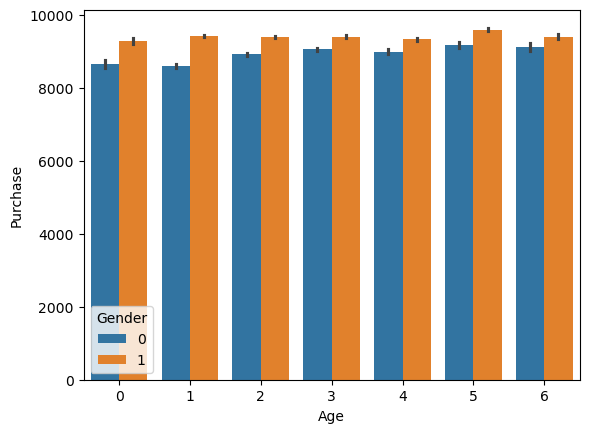

In [34]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=dataset)

### obserbation : Male are purchase more than female

### Visualization : Occupation vs Purchase

<Axes: xlabel='Occupation', ylabel='Purchase'>

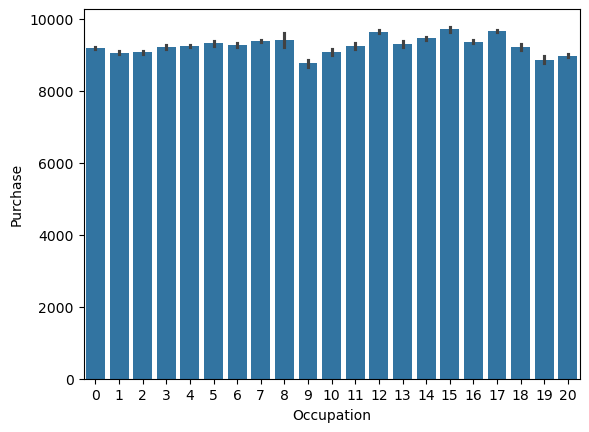

In [35]:
sns.barplot(x='Occupation',y='Purchase',data=dataset)

### Product_Category_1 vs Purchase

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

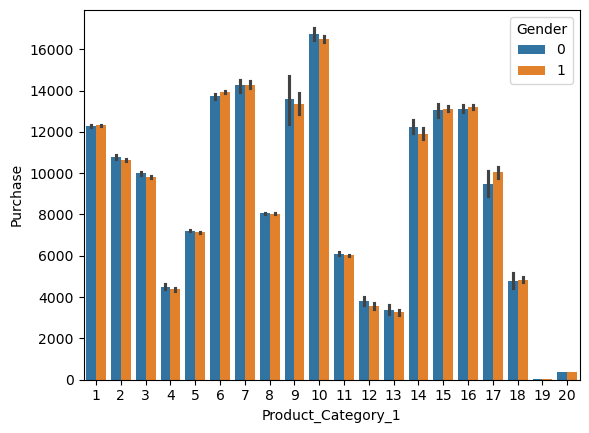

In [36]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=dataset)

### obserbation: product category respectivaly 10,7,6 ,16,15,14  are being more purchased  highest purchase range ~ 16000 

### Product_Category_2 vs Purchase

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

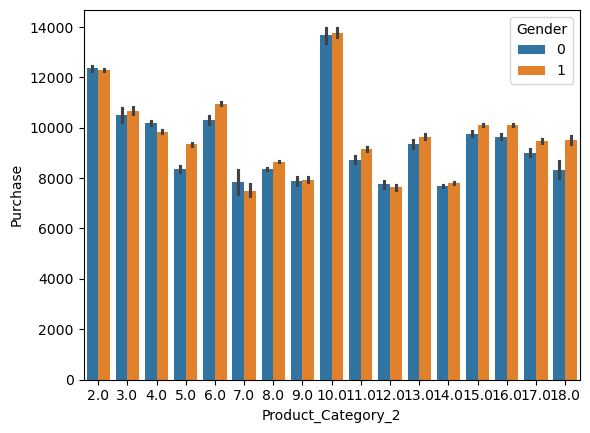

In [37]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=dataset)

### Obserbation : Product_category_2 item number 10,2 and 3 are being most purchase  and highest purchase range is~ 14000

### Product_category_3 vs Purchase

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

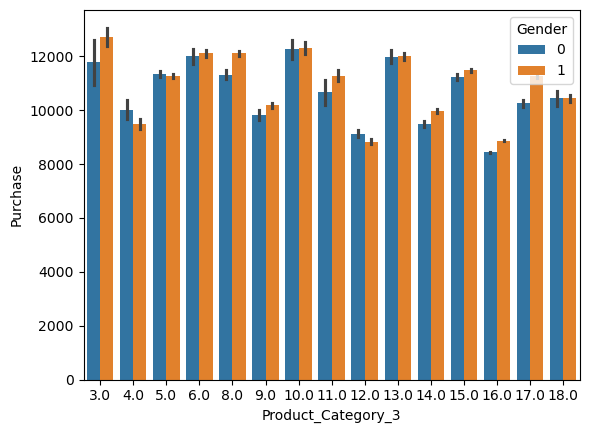

In [38]:
sns.barplot(x='Product_Category_3',y='Purchase',data=dataset,hue='Gender')

### Obserbation : product_category_3 purchase highest range is ~12000

In [39]:
dataset.drop('Product_ID',axis=1,inplace=True)

#### Note : Now we are going to split dataset into train and test ,Because we build model on train and test  on unknown and unfamiliar dataset to avoid overfitting.

In [40]:
df_test=dataset[dataset['Purchase'].isnull()]

In [41]:
df_train=dataset[~dataset['Purchase'].isnull()]

### Feature  Scalling

In [42]:
y=df_train['Purchase']
x=df_train.drop('Purchase',axis=1)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [45]:
 from sklearn.linear_model import LogisticRegression

In [ ]:
x_train=sc.fit_transform(x_train)

In [47]:
x_test=sc.transform(x_test)

In [ ]:
model = LogisticRegression(solver='liblinear', max_iter=100)
model.fit(x_train, y_train)

In [ ]:
prediction=model.predict(x_test)

### Obserbation & Process 
1. I first split df_train into X (features) and y (target). Then, I further split them into four parts: x_train, y_train, x_test, and y_test.
The logic is that x_train and y_train are used to train the model, while x_test and y_test are kept aside to evaluate the model on unseen data.
This helps us check if the model can generalize well to new data, not just memorize the training data.
2. For trainig the model we import standarscaler and logistic regression.
3. Our Dataset  was very heavy, with more than 700,000 rows and many columns. This caused my notebook kernel to crash, so I used a smaller dataset.